<a href="https://colab.research.google.com/github/Sanvee0306/DS/blob/main/Project1_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAN STATUS PREDICTION

## Data Processing

### Import Libraries :

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset :

In [84]:
test_data=pd.read_csv("/content/test.csv")

In [85]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [86]:
train_data=pd.read_csv("/content/train.csv")

In [87]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Let’s make a copy of the train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [88]:
train_original=train_data.copy()
test_original=test_data.copy()

## Understanding Data

In [89]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [90]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the training dataset.
And we have similar features in the test dataset as the training dataset except for the Loan_Status. We will predict the Loan_Status using the model built using the train data.



In [91]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [92]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [93]:
train_data.shape

(614, 13)

In [94]:
test_data.shape

(367, 12)

In [95]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [96]:
train_data['Loan_Status'].value_counts(normalize=True) 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

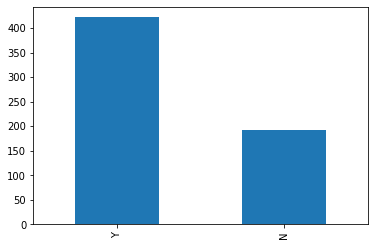

In [97]:
train_data['Loan_Status'].value_counts().plot.bar()

 let's visualize each variable separately.

### Independent Variable : Categorical

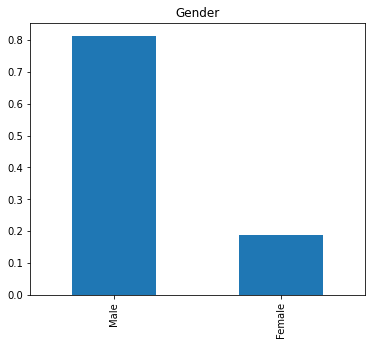

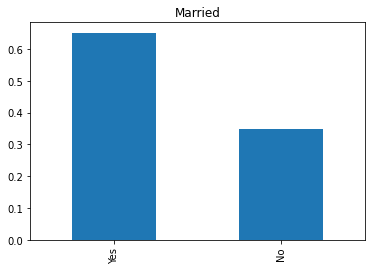

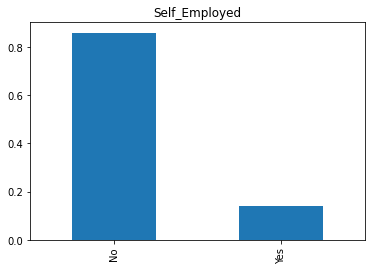

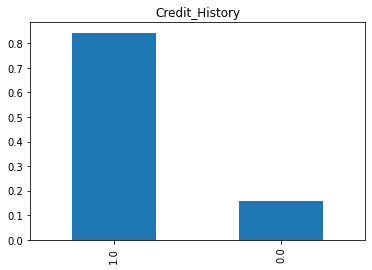

In [98]:
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(6,5), title='Gender')
plt.show()
train_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

It can be inferred from the above bar plots that:
1. 80% of applicants in the dataset are male.
2. Around 65% of the applicants in the dataset are married.
3. Around 15% of applicants in the dataset are self-employed.
4. Around 85% of applicants have repaid their doubts.

### Independent Variable : Ordinal 

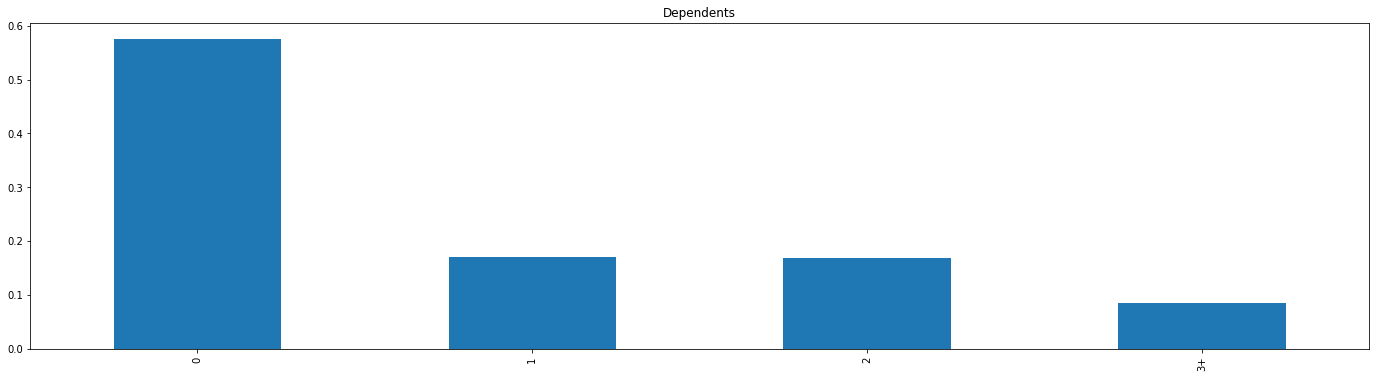

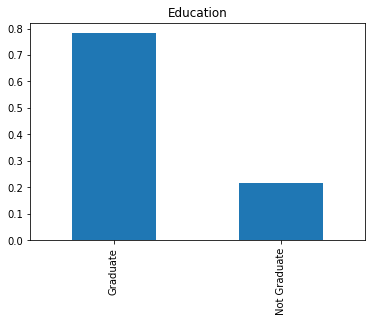

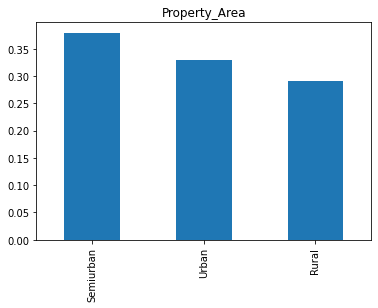

In [99]:
train_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
train_data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

The following inferences can be made from the above bar plots:
1. Most of the applicants don't have any dependents.
2. Around 80% of the applicants are Graduate.
3. Most of the applicants are from the Semiurban area.

### Independent Variable : Numerical 

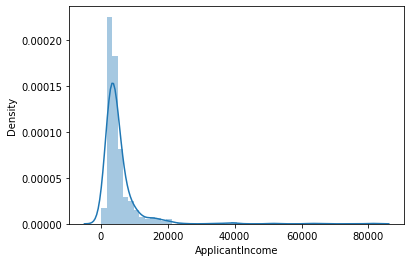

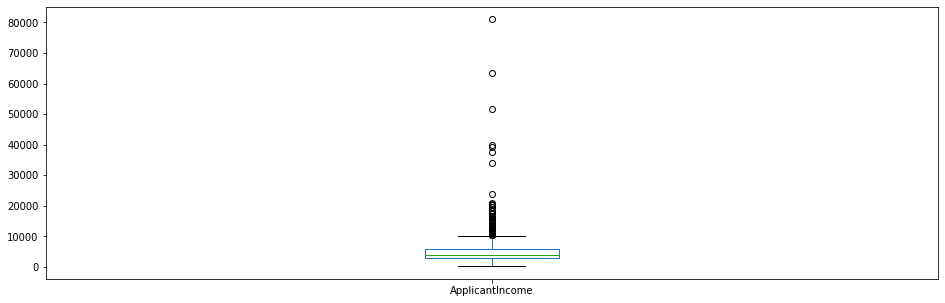

In [100]:
sns.distplot(train_data['ApplicantIncome'])
plt.show()
train_data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

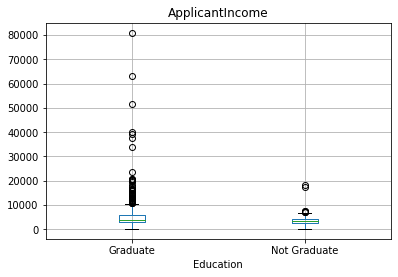

In [101]:
train_data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

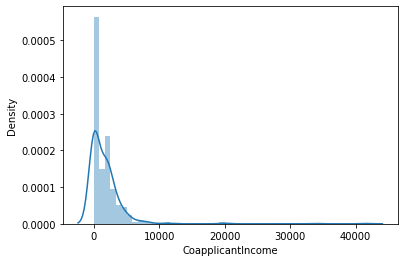

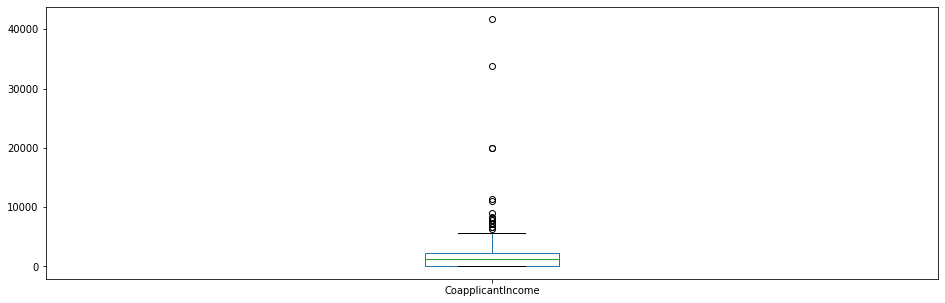

In [102]:
sns.distplot(train_data['CoapplicantIncome'])
plt.show()
train_data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

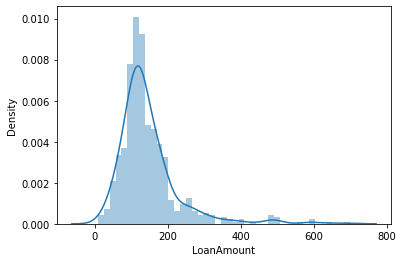

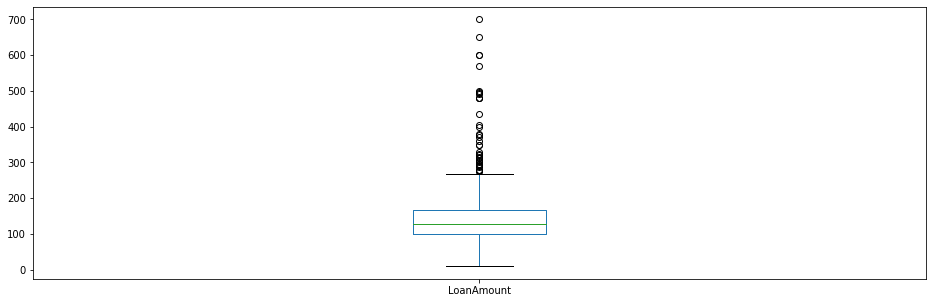

In [103]:
train_data.notna()
sns.distplot(train_data['LoanAmount'])
plt.show()
train_data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

## Bivariate Analysis

### Categorical Independent Variable vs Target Variable
 

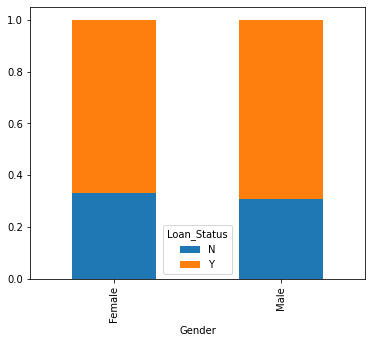

In [104]:
Gender=pd.crosstab(train_data['Gender'],train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

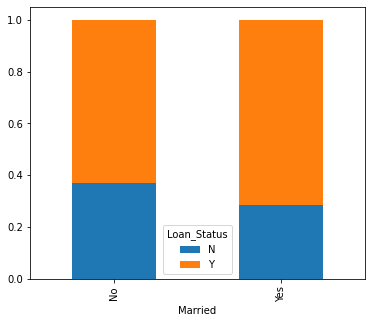

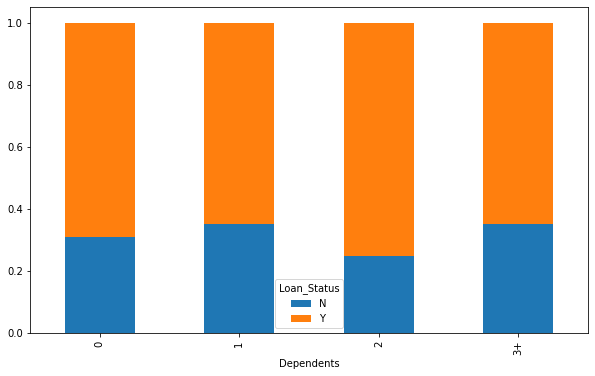

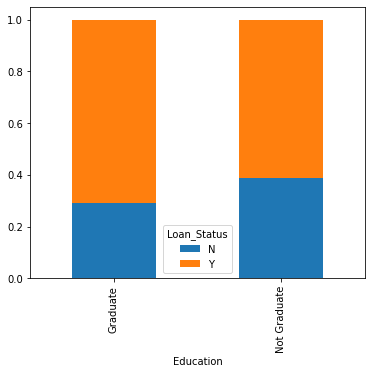

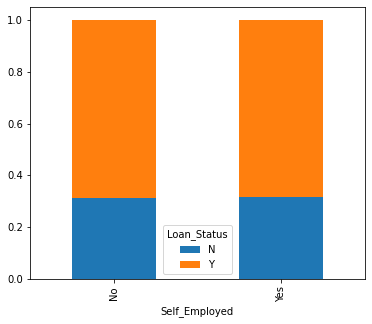

In [105]:
Married=pd.crosstab(train_data['Married'],train_data['Loan_Status'])
Dependents=pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
Education=pd.crosstab(train_data['Education'],train_data['Loan_Status'])
Self_Employed=pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(10,6))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

1. The proportion of married applicants is higher for approved loans.
2. Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
3. There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

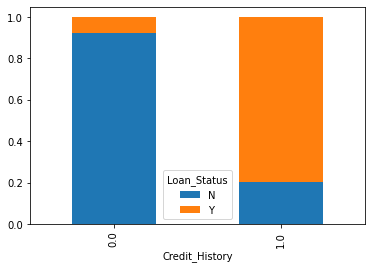

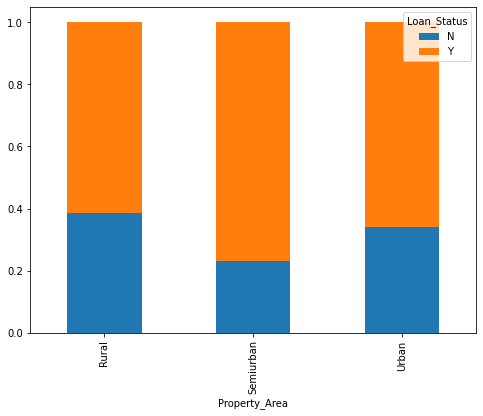

In [106]:
Credit_History=pd.crosstab(train_data['Credit_History'],train_data['Loan_Status'])
Property_Area=pd.crosstab(train_data['Property_Area'],train_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,6))
plt.show()

1. It seems people with a credit history as 1 are more likely to get their loans approved.
2. The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

### Numerical Independent Variable vs Target Variable 

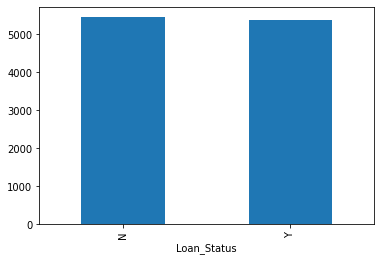

In [107]:
train_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We don’t see any change in the mean income.

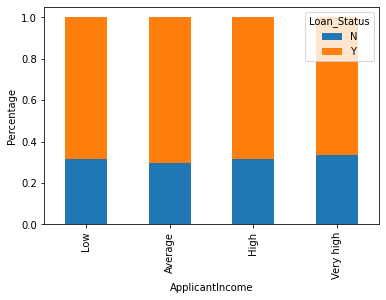

In [108]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_data['Income_bin']=pd.cut(train_data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train_data['Income_bin'],train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

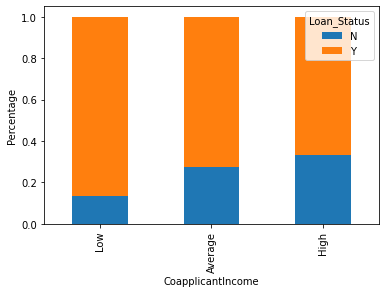

In [109]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train_data['Coapplicant_Income_bin']=pd.cut(train_data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train_data['Coapplicant_Income_bin'],train_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')


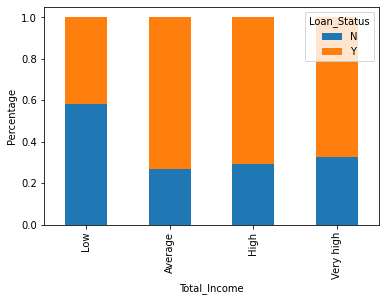

In [110]:
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_data['Total_Income_bin']=pd.cut(train_data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train_data['Total_Income_bin'],train_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

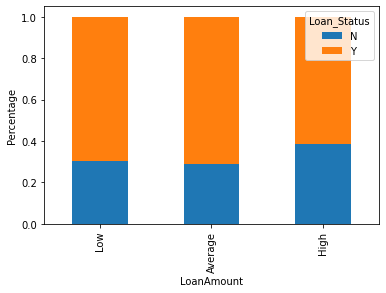

In [111]:
bins=[0,100,200,700]
group=['Low','Average','High']
train_data['LoanAmount_bin']=pd.cut(train_data['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train_data['LoanAmount_bin'],train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [112]:
#We will replace N with 0 and Y with 1.
train_data=train_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train_data['Dependents'].replace('3+', 3,inplace=True)
test_data['Dependents'].replace('3+', 3,inplace=True)
train_data['Loan_Status'].replace('N', 0,inplace=True)
train_data['Loan_Status'].replace('Y', 1,inplace=True)

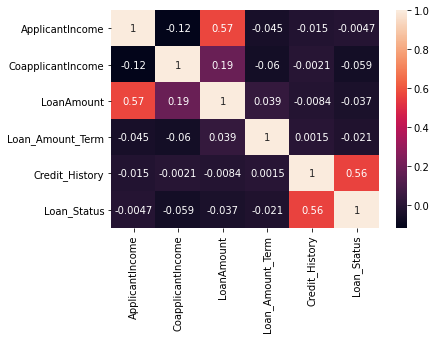

In [113]:
sns.heatmap(train_data.corr(),annot = True)

We see that the most correlate variables are 'ApplicantIncome — LoanAmount' and 'Credit_History — Loan_Status' & 'LoanAmount - CoapplicantIncome'.

## Handling Null Value 

In [114]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

In [115]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [116]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [117]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [118]:
#We will use the median to fill the null values.
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [119]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [120]:
#Let’s fill all the missing values in the test dataset too with the same approach.
test_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [121]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Outlier Treatment 

In [122]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [123]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.021798,342.822888,0.839237
std,4910.685399,2334.232099,60.953351,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


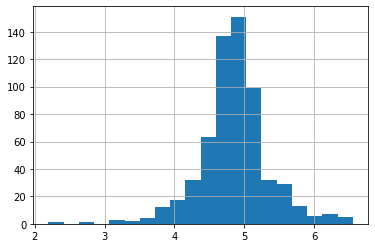

In [124]:
#remove the skewness by doing the log transformation.
train_data['LoanAmount_log']=np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])


## Feature Engineering : 

In [125]:
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
test_data['Total_Income']=test_data['ApplicantIncome']+test_data['CoapplicantIncome' ]

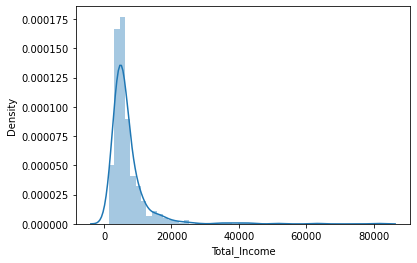

In [126]:
#Let’s check the distribution of Total Income.
sns.distplot(train_data['Total_Income'])

We can see it is shifted towards left, i.e., the distribution is right-skewed. So, let’s take the log transformation to make the distribution normal.

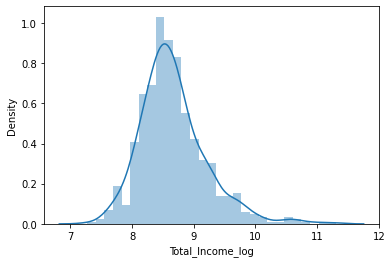

In [127]:
train_data['Total_Income_log'] = np.log(train_data['Total_Income'])
sns.distplot(train_data['Total_Income_log'])
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided.

In [128]:
#Let’s create the EMI feature now.
train_data['EMI']=train_data['LoanAmount']/train_data['Loan_Amount_Term']
test_data['EMI']=test_data['LoanAmount']/test_data['Loan_Amount_Term']

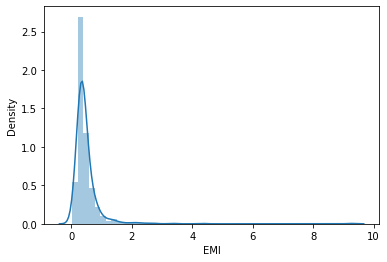

In [129]:
#Let’s check the distribution of the EMI variable.
sns.distplot(train_data['EMI'])

We can see it is shifted towards left, i.e., the distribution is right-skewed. So, let’s take the log transformation to make the distribution normal.

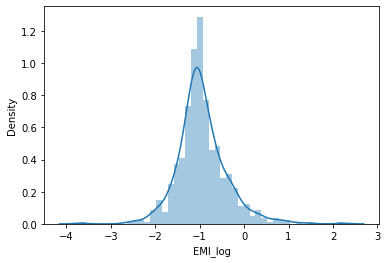

In [130]:
train_data['EMI_log'] = np.log(train_data['EMI'])
sns.distplot(train_data['EMI_log'])
test_data['EMI_log'] = np.log(test_data['EMI'])

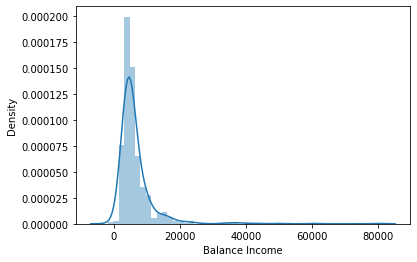

In [131]:
train_data['Balance Income'] = train_data['Total_Income']-(train_data['EMI']*1000)
test_data['Balance Income'] = test_data['Total_Income']-(test_data['EMI']*1000)
sns.distplot(train_data['Balance Income'])

Let us now drop the variables which we used to create these new features. The reason for doing this is, the correlation between those old features and these new features will be very high, and logistic regression assumes that the variables are not highly correlated. We also want to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [132]:
train_data=train_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test_data=test_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

## Model Building : Part I

Let’s build a logistic regression model and make predictions for the test dataset.

In [133]:
#Let's drop the Loan_ID variable as it does not have any effect on the loan status.
train_data=train_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)

In [134]:
X = train_data.drop('Loan_Status',1)
y = train_data.Loan_Status

In [135]:
#Let's make dummy variables for the categorical variables.
X = pd.get_dummies(X)
train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)

In [136]:
#let us import train_test_split.
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

## Model Building : Part II

### We will build the following models in this section.
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. XGBoost 
5. AdaBoost

In [137]:
#Let’s prepare the data for feeding into the models.
X = train_data.drop('Loan_Status',1)
y = train_data.Loan_Status

## Logistic Regression using stratified k-folds cross-validation 

In [138]:
from sklearn.model_selection import StratifiedKFold

In [139]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test_data)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))



1 of kfold 5 
accuracy_score 0.6910569105691057

2 of kfold 5 
accuracy_score 0.7804878048780488

3 of kfold 5 
accuracy_score 0.7804878048780488

4 of kfold 5 
accuracy_score 0.6910569105691057

5 of kfold 5 
accuracy_score 0.680327868852459

 Mean Validation Accuracy 0.7246834599493536


The mean validation accuracy for this model turns out to be 0.80.

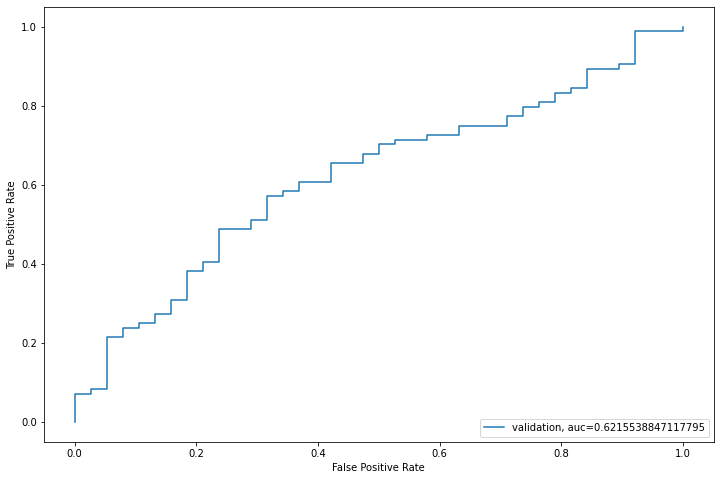

In [140]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
#Let’s predict the Loan_Status for validation set and calculate its accuracy.
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7891891891891892

In [143]:
#Let’s make prpred_test = model.predict(test)
pred_test = model.predict(test_data)

In [144]:
y_pred = model.predict(X)

In [145]:
#Classification report
from sklearn.metrics import classification_report  
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y,model.predict(X))
Logit_roc_score

0.7106906595576619

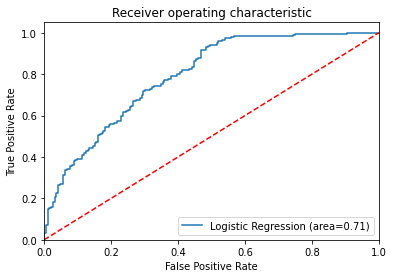

In [147]:
# plotting ROC curve
fpr, tpr, thresholds = roc_curve(y,model.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [148]:
import statsmodels.api as sm  
logit = sm.Logit(y, X)   
logit.fit().summary()

         Current function value: 0.455668
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      598
Method:                           MLE   Df Model:                           15
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.2665
Time:                        15:34:33   Log-Likelihood:                -279.78
converged:                      False   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 4.469e-35
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Credit_History              3.9006      0.420      9.283      0.000       3.077       4.724
LoanAmount_log             -0.4040      0.516     -0.783      0.433      -1.415       0.607
Total_Income            -4.541e-05        nan        nan        nan         nan         nan
Total_Income_log            0.5700      0.468      1.219      0.223      -0.347       1.487
EMI                      8.629e-05        nan        nan        nan         nan         nan
EMI_log                    -0.0178      0.599     -0.030      0.976      -1.191       1.156
Balance Income           2.092e-06        nan        nan        nan         nan         nan
Gender_Female               6.0132        nan        nan        nan         nan         nan
Gender_Male                 5.9318        nan        nan        nan         nan         nan
Married_No                 -2.8974   8.97e+06  -3.23e-07      1.000   -1.76e+07    1.76e+07
Married_Yes                -2.3173   9.01e+06  -2.57e-07      1.000   -1.77e+07    1.77e+07
Dependents_3               -6.4006   5.14e+06  -1.24e-06      1.000   -1.01e+07    1.01e+07
Dependents_0               -6.4844   5.31e+06  -1.22e-06      1.000   -1.04e+07    1.04e+07
Dependents_1               -6.9170   5.16e+06  -1.34e-06      1.000   -1.01e+07    1.01e+07
Dependents_2               -6.2046    5.1e+06  -1.22e-06      1.000      -1e+07       1e+07
Education_Graduate         -0.2639   5.06e+05  -5.22e-07      1.000   -9.91e+05    9.91e+05
Education_Not Graduate     -0.6043   5.94e+05  -1.02e-06      1.000   -1.16e+06    1.16e+06
Self_Employed_No           -1.1119   1.86e+06  -5.98e-07      1.000   -3.65e+06    3.65e+06
Self_Employed_Yes          -1.1534   2.34e+06  -4.94e-07      1.000   -4.58e+06    4.58e+06
Property_Area_Rural        -1.0890   7.91e+06  -1.38e-07      1.000   -1.55e+07    1.55e+07
Property_Area_Semiurban    -0.1636   7.91e+06  -2.07e-08      1.000   -1.55e+07    1.55e+07
Property_Area_Urban        -0.8378   7.91e+06  -1.06e-07      1.000   -1.55e+07    1.55e+07
===========================================================================================
"""

## Decision Tree 

In [149]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [150]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [151]:
X = train_data.drop('Loan_Status',1)
y = train_data.Loan_Status

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [153]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)

0.8292682926829268

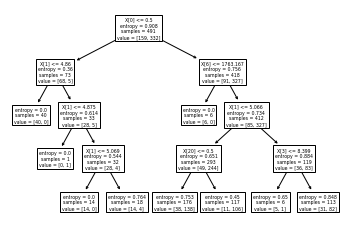

In [154]:
from sklearn import tree
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)
#PLot the decision tree
tree.plot_tree(model);

In [155]:
#Predicting on test data
pred = model.predict(x_test) # predicting on test data set 
pd.Series(pred).value_counts() # getting the count of each category

1    105
0     18
dtype: int64

In [156]:
pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [157]:
pd.crosstab(y_test,pred) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Loan_Status,,
0,15,18
1,3,87


In [158]:
# Accuracy 
np.mean(pred==y_test)

0.8292682926829268

In [159]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [160]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [161]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [162]:
#Find the accuracy
model.score(x_test,y_test)

-0.2996158770806656

In [163]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test_data)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7154471544715447

2 of kfold 5 
accuracy_score 0.7073170731707317

3 of kfold 5 
accuracy_score 0.7560975609756098

4 of kfold 5 
accuracy_score 0.7398373983739838

5 of kfold 5 
accuracy_score 0.6557377049180327

 Mean Validation Accuracy 0.7148873783819805


## Random Forest :  

In [164]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test_data)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8373983739837398

2 of kfold 5 
accuracy_score 0.8211382113821138

3 of kfold 5 
accuracy_score 0.7886178861788617

4 of kfold 5 
accuracy_score 0.7804878048780488

5 of kfold 5 
accuracy_score 0.7540983606557377

 Mean Validation Accuracy 0.7963481274157004


In [165]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [166]:
df_norm = norm_func(train_data.iloc[:,:])
df_norm.tail(10)

,Credit_History,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,EMI_log,Balance Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
604,1.0,1.0,0.920874,0.132708,0.525982,0.146643,0.677999,0.151529,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
605,1.0,0.0,0.609760,0.059805,0.362057,0.074375,0.566154,0.088750,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
606,1.0,1.0,0.678954,0.056035,0.349746,0.049383,0.499884,0.087900,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
607,1.0,1.0,0.656664,0.049725,0.327671,0.044565,0.483473,0.082305,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
608,1.0,1.0,0.570737,0.047010,0.317534,0.029810,0.420209,0.081328,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
609,1.0,1.0,0.474397,0.018326,0.173438,0.018669,0.349278,0.054676,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,1.0,1.0,0.342605,0.033485,0.259759,0.021379,0.369460,0.069120,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,1.0,1.0,0.766255,0.086352,0.434828,0.073472,0.564161,0.114681,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,1.0,1.0,0.696827,0.077189,0.412042,0.053598,0.513043,0.108007,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
613,0.0,0.0,0.618561,0.039481,0.287041,0.037338,0.455419,0.073153,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [167]:
x = df_norm.drop(['Loan_Status'],axis=1)
y = df_norm['Loan_Status']

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [169]:
from sklearn.ensemble import RandomForestClassifier as RF

In [170]:
train_data = RF(n_estimators=100,max_depth=10,min_samples_split=20,criterion='entropy')

In [171]:
test_data = RF(n_estimators=100,max_depth=10,min_samples_split=20,criterion='entropy')

In [172]:
train_data.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
test_data.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [174]:
model = RF(criterion = 'entropy',max_depth=3)

In [175]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [176]:
print('Train accuracy: {}'.format(train_data.score(x_train, y_train)))
print('Test accuracy: {}'.format(test_data.score(x_test, y_test)))

Train accuracy: 0.835030549898167
Test accuracy: 0.8211382113821138


In [177]:
model1 = RF(n_estimators=100,max_depth=10,min_samples_split=20,criterion='gini')


In [178]:
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
print('Train accuracy: {}'.format(model1.score(x_train, y_train)))
print('Test accuracy: {}'.format(model1.score(x_test, y_test)))

Train accuracy: 0.8411405295315683
Test accuracy: 0.8048780487804879


## XGBOOST : 

In [180]:
!pip install xgboost

In [181]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [182]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [183]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [184]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [185]:
predictions

[0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0]

In [186]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.82%


In [187]:
predictions

[0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0]

## AdaBoost : 

In [188]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [189]:
num_trees = 50
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7867265996827075


## Stacking Ensemble :

In [190]:
# Stacking Ensemble for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [191]:
kfold = KFold(n_splits=10, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.7738498149127446
